# Schrodinger in au: -$\frac{1}{2\mu  }\frac{d^2\psi}{dr^2} + (\frac{l(l+1)}{2\mu r^2} + V(r))\psi = E\psi$ 
### $\psi'' = -2\mu(E - \frac{l(l+1)}{2\mu r^2} - V(r))\psi$
### $\implies \psi'' + 2\mu(E - \frac{l(l+1)}{2\mu r^2} - V(r))\psi = 0$
### $\psi'' + k^2(r)\psi = 0$
### define  $k^2(r) = 2\mu(E - V(r) - \frac{l(l+1)}{2\mu r^2})$

### $\psi(r_{n + 1}) - 2\psi(r_{n}) + \psi(r_{n - 1})  + k^2(r_{n})\psi(r_{n}) = 0$


### $\psi(r_{n+1}) = \frac{2(1-\frac{5}{12}(dr)^2k^2_{n})\psi_{n} - (1 + \frac{1}{12}(dr)^2k^2_{n-1})\psi_{n-1}}{1 + \frac{1}{12}(dr)^2k^2_{n+1}}    $



https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Time_Dependent_Quantum_Mechanics_and_Spectroscopy_(Tokmakoff)/01%3A_Overview_of_Time-Independent_Quantum_Mechanics/1.05%3A_Numerically_Solving_the_Schrodinger_Equation

https://www.youtube.com/watch?v=kuP-tkQen1k

https://cocalc.com/projects/45117c74-7840-4124-9f55-83089957de21/files/handouts/TutorialSolutions/tutorial16.md

chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://indico.mitp.uni-mainz.de/event/279/sessions/996/attachments/2961/3450/presentation.pdf


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import scipy
from scipy import interpolate
from scipy import integrate
N = 100000 # number of iterator steps

## Step 1: Finding $\psi(r)$ numerically, $l$ = 0, $k^2(r) = 2\mu(E - V(r))$

In [5]:
tol = 1e-4
r = np.linspace(1e-30,80, N) # range of r values to iterate over, 0 -> 80 Bohr radii
dr = r[1] - r[0] # spacing dr, h in above equations
print(f' dr = {dr}')
psi = np.zeros(N)  # Initializing psi(r) as array of zeros

Vo = -0.00003166808534191 # -10K in Hartrees for the potential depth
Vr = np.zeros(N) # Initialize the square well potential V(r)
Vr[0:int(round(N/2))] = Vo # replace all entries up to r = 40 Bohr radii with -10K in Hartrees
Eo = 1e5*3.166808534191e-12 # inital particle energy, 1uK in Hartrees
me = 9.1093837e-28 # electron mass in grams
mrb_g = 1.4192261e-22 # rubidium mass in grams
mrb = mrb_g/me # rubidium mass in au
mu = (mrb**2)/(2*mrb) # reduced mass of rubidium
ksq = 2*mu*(Eo - Vr) # wave number function k


#print(f' mu = {mu}')
#print(f' k[49950:50020] = {k[49950:50020]}')


 dr = 0.0008000080000800008


## $\psi(r_{n+1}) = \frac{2(1-\frac{5}{12}(dr)^2k^2_{n})\psi_{n} - (1 + \frac{1}{12}(dr)^2k^2_{n-1})\psi_{n-1}}{1 + \frac{1}{12}(dr)^2k^2_{n+1}}    $

 Psi(0) = 0.0


Text(0, 0.5, '$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')

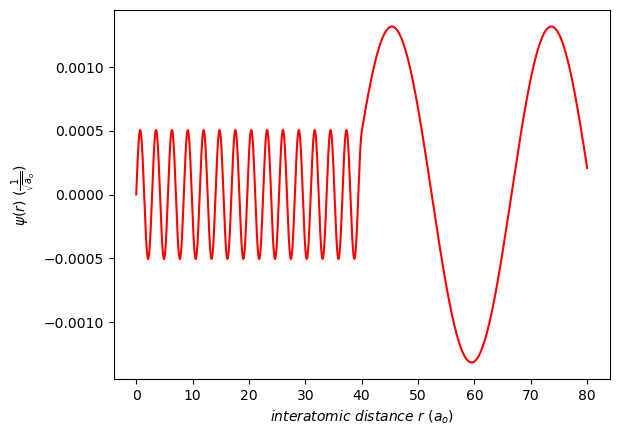

In [7]:
def wavefunction(Energy, N): # function to find psi(r)
    psi[0] = 0 # impose boundary condition psi(0) = 0
    psi[1] = dr # let psi(1) = the spacing length
    #print(f' psi[1] = {psi[1]}')

    for i in range(2,N):  # Numerov Algorithm, range is 2 - N since psi(0), psi(1) already set
        #if i < 100:
         #   print(f' first term in numerator is {(2*(1 - (5/12)*(dr**2)*k[i-1])*psi[i-1])}')
        psi[i] = ((2*(1 - (5/12)*(dr**2)*ksq[i-1])*psi[i-1]) - ((1 + (1/12)*(dr**2)*ksq[i-2])*psi[i-2]))/(1 + (1/12)*(dr**2)*ksq[i])

            
    return psi
Psi_r = wavefunction(Eo,N)
def normalization(PSI): # normalization function
    psi_sq = (wavefunction(Eo,N)/r)**2  # (psi/r)^2 for the integral
    I = scipy.integrate.simpson(psi_sq, dx = 1) # integration of psi^2
    normalization_constant = 1/I #to properly normalize, divide by the value of the integral over the whole region in which it is defined
    return normalization_constant 
Psi = Psi_r*(normalization(Psi_r))
print(f' Psi(0) = {Psi[0]}')
plt.plot(r, Psi, label = f' $\\psi(r)$', color = 'red') 
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel('$\\psi(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)')

[array([0.        , 0.00080001, 0.00160002, ..., 0.19391618, 0.19470994,
       0.1955037 ]), array([1.        , 1.        , 0.99999841, ..., 0.99219181, 0.99218798,
       0.99218414])]


(0.0, 10.0)

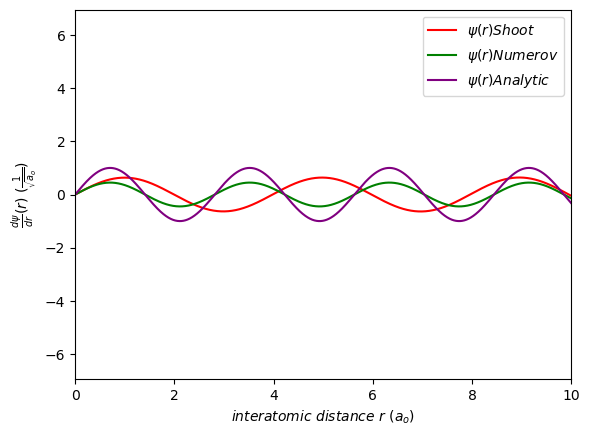

In [60]:
def shoot_schrodinger_derivative(E, x, V):
    dx = x[1] - x[0] # discrete step size
    
    psi_shoot = np.zeros(N) # Initialize wave function psi
    chi_shoot = np.zeros(N) # Initialize derivative of psi
    chi_shoot[0] = 1 # set initial conditions
    
    for i in range(N-1):
        psi_shoot[i+1] = psi_shoot[i] + chi_shoot[i]*dr
        chi_shoot[i+1] = chi_shoot[i] + ((V[i] - E)*psi_shoot[i]*dx)/2*mrb
    return [psi_shoot, chi_shoot]

psi_shoot = shoot_schrodinger_derivative(Eo, r, Vr)[0]
psi_prime = shoot_schrodinger_derivative(Eo, r, Vr)[1]

plt.plot(r, psi_shoot, label = "$\\psi(r) Shoot$", color = 'red')
#plt.plot(r, psi_prime, label = "$\\frac{d\\psi}{dr}(r)$", color = 'blue')
plt.plot(r, Psi_r, label =  "$\\psi(r) Numerov$", color = 'green') 
plt.plot(r, np.sin(K*r), label =  "$\\psi(r) Analytic$", color = 'purple') 


#plt.plot(r, Psi_r, label = "$\\psi(r)$", color = 'red')
plt.xlabel('$ interatomic$ $distance$ $r$ $(a_{o})$')
plt.ylabel("$\\frac{d\\psi}{dr}(r)$ ($\\frac{1}{\\sqrt{a_{o}}}$)")
plt.legend()

print(shoot_schrodinger_derivative(Eo, r, Vr))
plt.xlim(0,10)

### $\psi(r) = sin(kr + \delta), \frac{d\psi}{dr} = kcos(kr + \delta)$
### $\frac{\psi}{\frac{d\psi}{dr}} = \frac{1}{k}tan(kr + \delta)$
### $tan^{-1}(\frac{kdr\psi}{d\psi}) = kr + \delta$
### $\delta = tan^{-1}(\frac{kdr\psi_{n}}{\psi_{n} - \psi_{n-1}}) - kr $

In [44]:
K = np.sqrt(2*mu*(Eo - Vo))
k = np.sqrt(2*mu*Eo)
a = 40
delta = np.arctan((k/K)*np.tan(K*a)) - k*a
print(f' delta expected = {delta}')

wavelength = 2*np.pi/k
#print(f' wavelength = {wavelength} ao^-1')




ur_in = np.sin(K*r)
ur_inprime = K*np.cos(K*r)

ur_out = np.sin(k*r + delta)
ur_outprime = k*np.cos(k*r + delta)

d = np.arctan((k*ur_out)/ur_outprime) - k*r

vals = [d[0]]
for i in range(1, N):
    if abs(d[i] - d[i - 1]) > 1:
        vals.append(d[i])
print(f' delta diff = {(vals[7] - vals[6])/np.pi}')

print(d[39015])
plt.plot(r, d)
plt.hlines(delta, min(r), max(r), linestyle = 'dashed', color = 'black')
plt.vlines(a, -17.5, 0, linestyle = 'dashed', color = 'black')
print(f' delta numeric = {d[-9850]}')
#print(f' delta/2pi = {d/(2*np.pi)}')

 delta expected = -8.503667791849654


IndexError: list index out of range

In [11]:
ur_in = np.sin(K*r)
ur_out = np.sin(k*r + delta)
ur_outprime = k*np.cos(k*r + delta)
d = np.arctan((k*ur_out)/ur_outprime) - k*r
print(f' delta = {d}')

print(f' delta/2pi = {d/(2*np.pi)}')

 delta = [  0.92111017   0.92111017   0.92111017 ... -17.92844575 -17.92844575
 -17.92844575]
 delta/2pi = [ 0.14659924  0.14659924  0.14659924 ... -2.85340076 -2.85340076
 -2.85340076]


### $\delta = tan^{-1}(\frac{k\psi_{n}}{\frac{d\psi_{n}}{dr}}) - kr $

In [13]:
delta_test = np.arctan((ksq*

SyntaxError: incomplete input (1358363453.py, line 1)